### 연속형 독립변수가 하나인 모델 - 단순회귀

In [3]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리(경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision 3

# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [4]:
# 데이터 불러오기
beer = pd.read_csv('/content/drive/MyDrive/python study/Statistics/dataset/5-1-1-beer.csv')
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


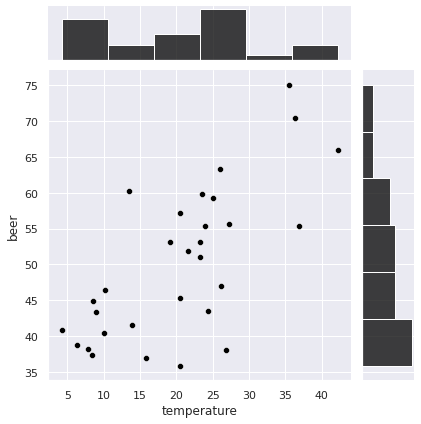

In [5]:
# 산포도로 기온과 맥주 매상의 관계 보기
sns.jointplot(x = 'temperature', y = 'beer',
              data = beer, color = 'black')

#### 모델 구축
맥주 매상 ~ N(b0 + b1*기온, s2)  

종속변수에 맥주 매상, 독립변수에 기온을 사용한 정규선형모델을 구축한다.

모델 구축의 장점  :  

1) 현상을 해석할 수 있다.  
- 계수 b1이 0이 아니라고 판단할 수 있게 되면 맥주 매상은 기온의 영향을 받는다고 판단할 수 있다.  
- 계수 b1의 부호를 알면 기온이 오르면 맥주 매상이 올라갈지 떨어질지 판단할 수 있다. 
- 계수 검정 대신 AIC를 이용한 모델 선택 가능

2) 예측이 가능하다.
- 계수 b0과 b1, 기온을 알면 맥주 매상의 기댓값을 계산할 수 있다.

In [6]:
# statsmodels를 이용한 모델링
lm_model = smf.ols(formula = 'beer ~ temperature', data = beer).fit()

In [7]:
# summary 함수 사용하여 추정 결과 표시
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           1.11e-05
Time:                        14:20:59   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### summmary 함수의 출력 내용 설명
p값이 매우 작아 0이 되었으므로, 기온에 대한 계수는 유의미하게 0과 다르다고 판단할 수 있다. 즉, 기온이 맥주 매상에 영향을 끼친다는 것을 알 수 있다. 기온의 coef값이 0.7654로 양수이므로 기온이 오르면 맥주 매상이 오른다고 판단 할 수 있다. 이 정도 해석은 산포도를 보고 알 수 있지만, 독립변수가 많아지는 등 복잡한 모델의 경우에은 모델을 구축하고 그 계수를 보는 것이 해석하기 쉽다.

* Dep.Variable : 종속변수의 이름. Dep은 Depended의 약자로 종속변수라는 의미
* Model, Method : 범용최소제곱법을 사용했다는 설명
* Date, Time : 모델을 추정한 일시
* No.Observations : 샘플사이즈
* Df Residuals : 샘플사이즈에서 추정된 파라미터 수를 뺀 것
* Df Model : 사용된 독립변수의 수
* Covariance Type : 공분산 타입. 특별히 지정하지 않으면 nonrobust가 됨
* R-squared, Adj. R-squared : 결정계수와 자유도 조정이 끝난 결정계수
* F-statistic, Prob(F-statistic) : 분산분석 결과
* Log-Likelihood : 최대로그우도
* AIC : 아카이케 정보 기준
* BIC : 베이즈 정보 기준

#### AIC를 이용한 모델 선택

In [8]:
null_model = smf.ols('beer ~ 1', data = beer).fit()

In [9]:
null_model.aic

227.942

In [10]:
lm_model.aic

208.909

AIC = -2*(최대로그우도 - 추정된 파라미터 수)

In [11]:
lm_model.llf

-102.455

In [12]:
lm_model.df_model

1.000

In [13]:
-2*(lm_model.llf - (lm_model.df_model + 1))

208.909